In [2]:
import numpy as np
#import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import glob
import os
spiral_training_healthy_dir_ = '/spiral/training/healthy'
spiral_training_healthy_filepaths = [f for f in glob.glob(r'/content/drive/My Drive/project_drawings/spiral/training/healthy/*.png')]
labels = ["healthy"]*len(spiral_training_healthy_filepaths)

spiral_training_healthy_filepaths = pd.Series(spiral_training_healthy_filepaths, name = 'Image_Path').astype(str)
spiral_training_healthy_labels = pd.Series(labels, name='Class').astype(str)

spiral_training_healthy_df = pd.concat([spiral_training_healthy_filepaths, spiral_training_healthy_labels], axis=1)
spiral_training_healthy_df

,Image_Path,Class
0,/content/drive/My Drive/project_drawings/spira...,healthy
1,/content/drive/My Drive/project_drawings/spira...,healthy
2,/content/drive/My Drive/project_drawings/spira...,healthy
3,/content/drive/My Drive/project_drawings/spira...,healthy
4,/content/drive/My Drive/project_drawings/spira...,healthy
5,/content/drive/My Drive/project_drawings/spira...,healthy
6,/content/drive/My Drive/project_drawings/spira...,healthy
7,/content/drive/My Drive/project_drawings/spira...,healthy
8,/content/drive/My Drive/project_drawings/spira...,healthy
9,/content/drive/My Drive/project_drawings/spira...,healthy


In [30]:
spiral_training_parkinson_dir_ = './spiral/training/parkinson'
spiral_training_parkinson_filepaths = [f for f in glob.glob(r'/content/drive/My Drive/project_drawings/spiral/training/parkinson/*.png')]
labels = ["parkinson"]*len(spiral_training_parkinson_filepaths)

spiral_training_parkinson_filepaths = pd.Series(spiral_training_parkinson_filepaths, name = 'Image_Path').astype(str)
spiral_training_parkinson_labels = pd.Series(labels, name='Class')

spiral_training_parkinson_df = pd.concat([spiral_training_parkinson_filepaths, spiral_training_parkinson_labels], axis=1)
training_spiral_df = pd.DataFrame(spiral_training_healthy_df.append(spiral_training_parkinson_df,ignore_index = True))
training_spiral_df

<ipython-input-30-f53d69fde5a2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_spiral_df = pd.DataFrame(spiral_training_healthy_df.append(spiral_training_parkinson_df,ignore_index = True))


,Image_Path,Class
0,/content/drive/My Drive/project_drawings/spira...,healthy
1,/content/drive/My Drive/project_drawings/spira...,healthy
2,/content/drive/My Drive/project_drawings/spira...,healthy
3,/content/drive/My Drive/project_drawings/spira...,healthy
4,/content/drive/My Drive/project_drawings/spira...,healthy
...,...,...
67,/content/drive/My Drive/project_drawings/spira...,parkinson
68,/content/drive/My Drive/project_drawings/spira...,parkinson
69,/content/drive/My Drive/project_drawings/spira...,parkinson
70,/content/drive/My Drive/project_drawings/spira...,parkinson


In [31]:
spiral_testing_healthy_dir_ = '//spiral/testing/healthy'
spiral_testing_healthy_filepaths = [f for f in glob.glob(r'/content/drive/My Drive/project_drawings/spiral/testing/healthy/*.png')]
labels = ["healthy"]*len(spiral_testing_healthy_filepaths)
spiral_testing_healthy_filepaths = pd.Series(spiral_testing_healthy_filepaths, name = 'Image_Path').astype(str)
spiral_testing_healthy_labels = pd.Series(labels, name='Class')

spiral_testing_healthy_df = pd.concat([spiral_testing_healthy_filepaths, spiral_testing_healthy_labels], axis=1)
spiral_testing_healthy_df

,Image_Path,Class
0,/content/drive/My Drive/project_drawings/spira...,healthy
1,/content/drive/My Drive/project_drawings/spira...,healthy
2,/content/drive/My Drive/project_drawings/spira...,healthy
3,/content/drive/My Drive/project_drawings/spira...,healthy
4,/content/drive/My Drive/project_drawings/spira...,healthy
5,/content/drive/My Drive/project_drawings/spira...,healthy
6,/content/drive/My Drive/project_drawings/spira...,healthy
7,/content/drive/My Drive/project_drawings/spira...,healthy
8,/content/drive/My Drive/project_drawings/spira...,healthy
9,/content/drive/My Drive/project_drawings/spira...,healthy


In [32]:
spiral_testing_parkinson_dir_ = './spiral/testing/parkinson'
spiral_testing_parkinson_filepaths = [f for f in glob.glob(r'/content/drive/My Drive/project_drawings/spiral/testing/parkinson/*.png')]
labels = ["parkinson"]*len(spiral_testing_parkinson_filepaths)

spiral_testing_parkinson_filepaths = pd.Series(spiral_testing_parkinson_filepaths, name = 'Image_Path').astype(str)
spiral_testing_parkinson_labels = pd.Series(labels, name='Class')

spiral_testing_parkinson_df = pd.concat([spiral_testing_parkinson_filepaths, spiral_testing_parkinson_labels], axis=1)
testing_spiral_df = pd.DataFrame(spiral_testing_healthy_df.append(spiral_testing_parkinson_df,ignore_index = True,))
testing_spiral_df

<ipython-input-32-134442910485>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing_spiral_df = pd.DataFrame(spiral_testing_healthy_df.append(spiral_testing_parkinson_df,ignore_index = True,))


,Image_Path,Class
0,/content/drive/My Drive/project_drawings/spira...,healthy
1,/content/drive/My Drive/project_drawings/spira...,healthy
2,/content/drive/My Drive/project_drawings/spira...,healthy
3,/content/drive/My Drive/project_drawings/spira...,healthy
4,/content/drive/My Drive/project_drawings/spira...,healthy
5,/content/drive/My Drive/project_drawings/spira...,healthy
6,/content/drive/My Drive/project_drawings/spira...,healthy
7,/content/drive/My Drive/project_drawings/spira...,healthy
8,/content/drive/My Drive/project_drawings/spira...,healthy
9,/content/drive/My Drive/project_drawings/spira...,healthy


In [33]:
data_obj = training_spiral_df.append(testing_spiral_df,ignore_index=True)
data_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  102 non-null    object
 1   Class       102 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


<ipython-input-33-8e4a7bcd8e8a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_obj = training_spiral_df.append(testing_spiral_df,ignore_index=True)


In [34]:
data_obj = data_obj.sample(frac = 1)
data_obj

,Image_Path,Class
96,/content/drive/My Drive/project_drawings/spira...,parkinson
58,/content/drive/My Drive/project_drawings/spira...,parkinson
60,/content/drive/My Drive/project_drawings/spira...,parkinson
15,/content/drive/My Drive/project_drawings/spira...,healthy
23,/content/drive/My Drive/project_drawings/spira...,healthy
...,...,...
0,/content/drive/My Drive/project_drawings/spira...,healthy
72,/content/drive/My Drive/project_drawings/spira...,healthy
34,/content/drive/My Drive/project_drawings/spira...,healthy
22,/content/drive/My Drive/project_drawings/spira...,healthy


In [35]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data_obj["Class"] = lb.fit_transform(data_obj["Class"])

image shape :  (256, 256, 3)


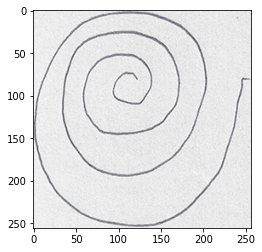

In [36]:
from PIL import Image
data = []   
for i in range(len(data_obj)):
    image = Image.open(data_obj['Image_Path'][i])
    #new_img = image.resize((100,100)) 
    #img_gray = new_img.convert('L')
    img_array = np.asarray(image)
    data.append([img_array, data_obj['Class'][i]])
    
plt.imshow(data[2][0])
print("image shape : ",img_array.shape)

In [37]:
x_data = []
y_data = []
for i in data:
    x_data.append(i[0])
    y_data.append(i[1])
x = np.array(x_data)
y = np.array(y_data)

<ipython-input-37-8b3e6f88869f>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x_data)


In [38]:
x1=x[:72]
y1=y[:72]
x2=x[72:]
y2=y[72:]


In [ ]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 1.1 MB/s eta 0:00:00


In [ ]:
import cv2
train_data_generator = ImageDataGenerator(rotation_range=60, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    brightness_range=[0.5, 1.5],
                                    horizontal_flip=True, 
                                    vertical_flip=True,
                                    zoom_range=0.1)

x3 = list(x1)
y3 = list(y1)

x_aug_train = []
y_aug_train = []
count=1

for (i, v) in enumerate(y3):
    x_img = x3[i]
    x_img = np.array(x_img)
    x_img = np.expand_dims(x_img, axis=0)
    aug_iter = train_data_generator.flow(x_img, batch_size=1, shuffle=True)
    for j in range(70):
        aug_image = next(aug_iter)[0].astype('uint8')
        x_aug_train.append(aug_image)
        y_aug_train.append(v)
        
print(len(x_aug_train))
print(len(y_aug_train))

x_train = x3 + x_aug_train
y_train = y3 + y_aug_train
print(len(x_train))
print(len(y_train))

test_data_generator = ImageDataGenerator(rotation_range=60, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    brightness_range=[0.5, 1.5],
                                    horizontal_flip=True, 
                                    vertical_flip=True,
                                    zoom_range=0.1)

x4 = list(x2)
y4 = list(y2)

x_aug_test = []
y_aug_test = []
count=1

for (i, v) in enumerate(y4):
    x_img = x4[i]
    x_img = np.array(x_img)
    x_img = np.expand_dims(x_img, axis=0)
    aug_iter = test_data_generator.flow(x_img, batch_size=1, shuffle=True)
    for j in range(20):
        aug_image = next(aug_iter)[0].astype('uint8')
        x_aug_test.append(aug_image)
        y_aug_test.append(v)
       
print(len(x_aug_test))
print(len(y_aug_test))

x_test = x4 + x_aug_test
y_test = y4 + y_aug_test
print(len(x_test))
print(len(y_test))

5040
5040
5112
5112
600
600
630
630


In [40]:
from PIL import Image
for i in range(len(x_train)):
    img = x_train[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    x_train[i] = img
    
for i in range(len(x_test)):
    #image = Image.open(x_test[i])
    #new_img = image.resize((100,100)) 
    #img_gray = new_img.convert('L')
    img = x_test[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_test[i] = img

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train/255.0
x_test = x_test/255.0

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(y_train.shape)

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

(5112,)


In [41]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5112, 128, 128, 1)
(5112, 2)
(630, 128, 128, 1)
(630, 2)


In [42]:
def parkinson_disease_detection_model(input_shape=(128, 128, 1)):
    regularizer = tf.keras.regularizers.l2(0.001)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))

    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform', name='fc3'))
    
    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [43]:
model= parkinson_disease_detection_model(input_shape=(128, 128, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 128)      0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [44]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=70, validation_data=(x_test, y_test))

Epoch 1/70
40/40 [==============================] - 20s 180ms/step - loss: 0.8537 - accuracy: 0.5031 - val_loss: 0.8484 - val_accuracy: 0.5000
Epoch 2/70
40/40 [==============================] - 5s 114ms/step - loss: 0.8462 - accuracy: 0.4849 - val_loss: 0.8414 - val_accuracy: 0.5095
Epoch 3/70
40/40 [==============================] - 5s 116ms/step - loss: 0.8392 - accuracy: 0.4947 - val_loss: 0.8349 - val_accuracy: 0.5000
Epoch 4/70
40/40 [==============================] - 5s 115ms/step - loss: 0.8321 - accuracy: 0.5127 - val_loss: 0.8289 - val_accuracy: 0.5000
Epoch 5/70
40/40 [==============================] - 5s 115ms/step - loss: 0.8269 - accuracy: 0.5016 - val_loss: 0.8235 - val_accuracy: 0.6762
Epoch 6/70
40/40 [==============================] - 5s 118ms/step - loss: 0.8210 - accuracy: 0.5010 - val_loss: 0.8182 - val_accuracy: 0.5651
Epoch 7/70
40/40 [==============================] - 5s 119ms/step - loss: 0.8160 - accuracy: 0.5096 - val_loss: 0.8126 - val_accuracy: 0.6889
Epoch

In [45]:
ypred = model.predict(x_test)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
print(classification_report(y_test_pred, ypred))

20/20 [==============================] - 1s 18ms/step
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       315
           1       0.86      0.79      0.82       315

    accuracy                           0.83       630
   macro avg       0.83      0.83      0.83       630
weighted avg       0.83      0.83      0.83       630



<Axes: >

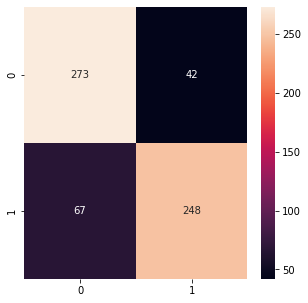

In [46]:
matrix = confusion_matrix(y_test_pred, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [81]:
def tr_plot(tr_data, start_epoch):
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    plt.style.use('fivethirtyeight')
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].set_title('Training Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].set_title('Training Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.show()

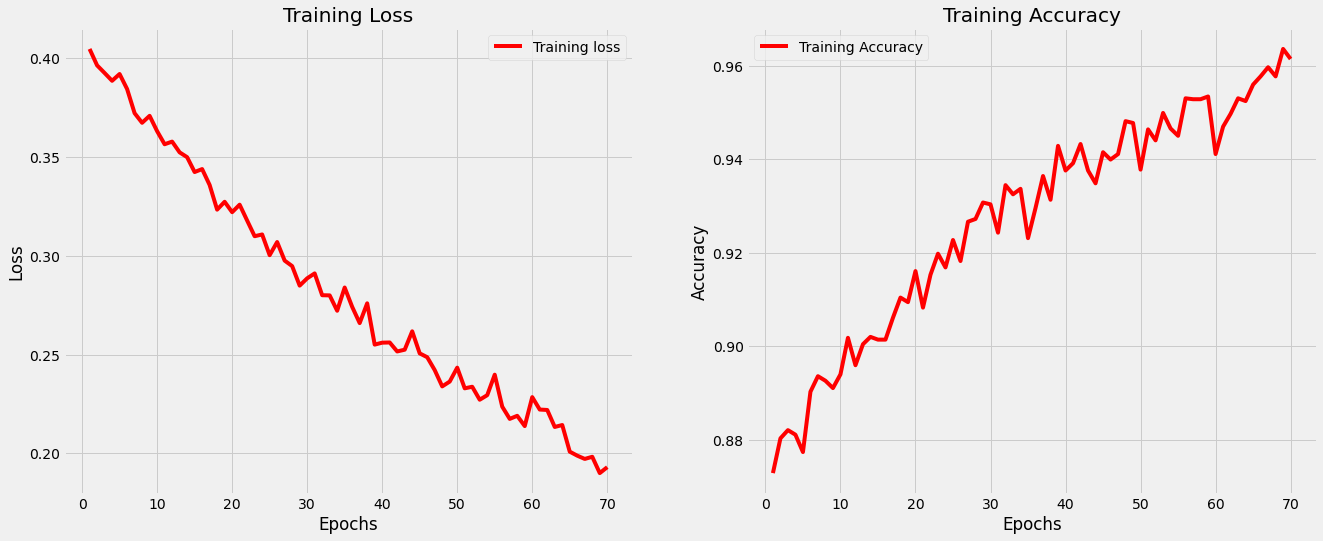

In [ ]:
tr_plot(hist,0)

/content/drive/My Drive/Copy of 1.png
(1, 128, 128, 1)
1/1 [==============================] - 0s 28ms/step
<class 'numpy.ndarray'>
Person has healthy. [[1. 0.]]


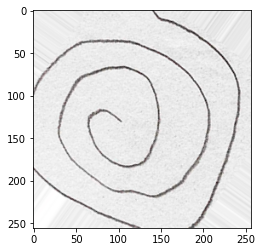

In [83]:
path = input()
image = Image.open(path)
new_img = image.resize((128,128)) 
plt.imshow(new_img)
img_gray = new_img.convert('L')
img_array = np.asarray(img_gray)
img_array = img_array.reshape(-1,128,128,1)
print(img_array.shape)
prediction = model.predict(img_array)
print(type(prediction[0]))
if np.any(prediction) > 0.5:
    
    print("Person has healthy.",prediction)
else:
    print("Person has Parkinson",prediction)
    
plt.imshow(image)

In [5]:
import glob
import os
wave_training_healthy_dir_ = './project_drawings/wave/training/healthy'
wave_training_healthy_filepaths = [f for f in glob.glob('/content/drive/My Drive/project_drawings/wave/training/healthy/*.png')]
labels = ["healthy"]*len(wave_training_healthy_filepaths)

wave_training_healthy_filepaths = pd.Series(wave_training_healthy_filepaths, name = 'Image_Path').astype(str)
wave_training_healthy_labels = pd.Series(labels, name='Class').astype(str)

wave_training_healthy_df = pd.concat([wave_training_healthy_filepaths, wave_training_healthy_labels], axis=1)
wave_training_healthy_df

,Image_Path,Class
0,/content/drive/My Drive/project_drawings/wave/...,healthy
1,/content/drive/My Drive/project_drawings/wave/...,healthy
2,/content/drive/My Drive/project_drawings/wave/...,healthy
3,/content/drive/My Drive/project_drawings/wave/...,healthy
4,/content/drive/My Drive/project_drawings/wave/...,healthy
5,/content/drive/My Drive/project_drawings/wave/...,healthy
6,/content/drive/My Drive/project_drawings/wave/...,healthy
7,/content/drive/My Drive/project_drawings/wave/...,healthy
8,/content/drive/My Drive/project_drawings/wave/...,healthy
9,/content/drive/My Drive/project_drawings/wave/...,healthy


In [6]:
wave_training_parkinson_dir_ = '/content/drive/My Drive/project_drawings/wave/training/parkinson'
wave_training_parkinson_filepaths = [f for f in glob.glob(r'/content/drive/My Drive/project_drawings/wave/training/parkinson/*.png')]
labels = ["parkinson"]*len(wave_training_parkinson_filepaths)

wave_training_parkinson_filepaths = pd.Series(wave_training_parkinson_filepaths, name = 'Image_Path').astype(str)
wave_training_parkinson_labels = pd.Series(labels, name='Class')

wave_training_parkinson_df = pd.concat([wave_training_parkinson_filepaths, wave_training_parkinson_labels], axis=1)
training_wave_df = pd.DataFrame(wave_training_healthy_df.append(wave_training_parkinson_df,ignore_index = True))
training_wave_df

<ipython-input-6-ff35c18f143c>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_wave_df = pd.DataFrame(wave_training_healthy_df.append(wave_training_parkinson_df,ignore_index = True))


,Image_Path,Class
0,/content/drive/My Drive/project_drawings/wave/...,healthy
1,/content/drive/My Drive/project_drawings/wave/...,healthy
2,/content/drive/My Drive/project_drawings/wave/...,healthy
3,/content/drive/My Drive/project_drawings/wave/...,healthy
4,/content/drive/My Drive/project_drawings/wave/...,healthy
...,...,...
67,/content/drive/My Drive/project_drawings/wave/...,parkinson
68,/content/drive/My Drive/project_drawings/wave/...,parkinson
69,/content/drive/My Drive/project_drawings/wave/...,parkinson
70,/content/drive/My Drive/project_drawings/wave/...,parkinson


In [7]:
wave_testing_healthy_filepaths = [f for f in glob.glob(r'/content/drive/My Drive/project_drawings/wave/testing/healthy/*.png')]
labels = ["healthy"]*len(wave_testing_healthy_filepaths)
wave_testing_healthy_filepaths = pd.Series(wave_testing_healthy_filepaths, name = 'Image_Path').astype(str)
wave_testing_healthy_labels = pd.Series(labels, name='Class')

wave_testing_healthy_df = pd.concat([wave_testing_healthy_filepaths, wave_testing_healthy_labels], axis=1)
wave_testing_healthy_df

,Image_Path,Class
0,/content/drive/My Drive/project_drawings/wave/...,healthy
1,/content/drive/My Drive/project_drawings/wave/...,healthy
2,/content/drive/My Drive/project_drawings/wave/...,healthy
3,/content/drive/My Drive/project_drawings/wave/...,healthy
4,/content/drive/My Drive/project_drawings/wave/...,healthy
5,/content/drive/My Drive/project_drawings/wave/...,healthy
6,/content/drive/My Drive/project_drawings/wave/...,healthy
7,/content/drive/My Drive/project_drawings/wave/...,healthy
8,/content/drive/My Drive/project_drawings/wave/...,healthy
9,/content/drive/My Drive/project_drawings/wave/...,healthy


In [8]:
wave_testing_parkinson_dir_ = './wave/testing/parkinson'
wave_testing_parkinson_filepaths = [f for f in glob.glob(r'/content/drive/My Drive/project_drawings/wave/testing/parkinson/*.png')]
labels = ["parkinson"]*len(wave_testing_parkinson_filepaths)

wave_testing_parkinson_filepaths = pd.Series(wave_testing_parkinson_filepaths, name = 'Image_Path').astype(str)
wave_testing_parkinson_labels = pd.Series(labels, name='Class')

wave_testing_parkinson_df = pd.concat([wave_testing_parkinson_filepaths, wave_testing_parkinson_labels], axis=1)
testing_wave_df = pd.DataFrame(wave_testing_healthy_df.append(wave_testing_parkinson_df,ignore_index = True,))
testing_wave_df

<ipython-input-8-1956d6b6bc88>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing_wave_df = pd.DataFrame(wave_testing_healthy_df.append(wave_testing_parkinson_df,ignore_index = True,))


,Image_Path,Class
0,/content/drive/My Drive/project_drawings/wave/...,healthy
1,/content/drive/My Drive/project_drawings/wave/...,healthy
2,/content/drive/My Drive/project_drawings/wave/...,healthy
3,/content/drive/My Drive/project_drawings/wave/...,healthy
4,/content/drive/My Drive/project_drawings/wave/...,healthy
5,/content/drive/My Drive/project_drawings/wave/...,healthy
6,/content/drive/My Drive/project_drawings/wave/...,healthy
7,/content/drive/My Drive/project_drawings/wave/...,healthy
8,/content/drive/My Drive/project_drawings/wave/...,healthy
9,/content/drive/My Drive/project_drawings/wave/...,healthy


In [9]:
data_obj = training_wave_df.append(testing_wave_df,ignore_index=True)
data_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  102 non-null    object
 1   Class       102 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


<ipython-input-9-e755bc25626e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_obj = training_wave_df.append(testing_wave_df,ignore_index=True)


In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data_obj["class"] = lb.fit_transform(data_obj["Class"])

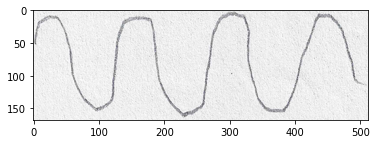

In [11]:
x = plt.imread(data_obj["Image_Path"][1])
plt.imshow(x)

In [12]:
x = plt.imread(data_obj['Image_Path'][0])
x.shape

(224, 512, 3)

image shape :  (317, 512, 3)


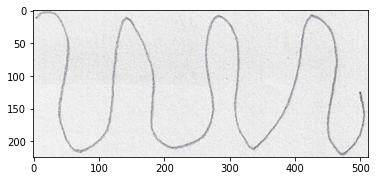

In [13]:
from PIL import Image
data = []   

for i in range(len(data_obj)):
    image = Image.open(data_obj['Image_Path'][i])
    #new_img = image.resize((100, 100)) 
    #img_gray = new_img.convert('L')
    img_array = np.asarray(image)
    data.append([img_array, data_obj['class'][i]])
    
plt.imshow(data[0][0])
print("image shape : ",img_array.shape)

In [14]:
x = []
y = []
for i in data:
    x.append(i[0])
    y.append(i[1])
x = np.array(x).reshape(-1)
y = np.array(y)

<ipython-input-14-2df49f125f17>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x).reshape(-1)


In [15]:
x1=x[:72]
y1=y[:72]
x2=x[72:]
y2=y[72:]

In [16]:



train_data_generator = ImageDataGenerator(rotation_range=5, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    brightness_range=(0.3,1.8),
                                    shear_range = 0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

x3 = list(x1)
y3 = list(y1)

x_aug_train = []
y_aug_train = []
count=1
for (i, v) in enumerate(y3):
    x_img = x3[i]
    x_img = np.array(x_img)
    x_img = np.expand_dims(x_img, axis=0)
    aug_iter = train_data_generator.flow(x_img, batch_size=1, shuffle=True)
    for j in range(70):
        aug_image = next(aug_iter)[0].astype('uint8')
        x_aug_train.append(aug_image)
        y_aug_train.append(v)
       
    
print(len(x_aug_train))
print(len(y_aug_train))

x_train = x3 + x_aug_train
y_train = y3 + y_aug_train
print(len(x_train))
print(len(y_train))

test_data_generator = ImageDataGenerator(rotation_range=5, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    brightness_range=(0.3,1.8),
                                    shear_range = 0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

x4 = list(x2)
y4 = list(y2)

x_aug_test = []
y_aug_test = []
count=1
for (i, v) in enumerate(y4):
    x_img = x4[i]
    x_img = np.array(x_img)
    x_img = np.expand_dims(x_img, axis=0)
    aug_iter = test_data_generator.flow(x_img, batch_size=1, shuffle=True)
    for j in range(20):
        aug_image = next(aug_iter)[0].astype('uint8')
        x_aug_test.append(aug_image)
        y_aug_test.append(v)
       
print(len(x_aug_test))
print(len(y_aug_test))

x_test = x4 + x_aug_test
y_test = y4 + y_aug_test
print(len(x_test))
print(len(y_test))

5040
5040
5112
5112
600
600
630
630


In [18]:
import cv2
from PIL import Image
for i in range(len(x_train)):
    img = x_train[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    x_train[i] = img
    
for i in range(len(x_test)):
    #image = Image.open(x_test[i])
    #new_img = image.resize((100,100)) 
    #img_gray = new_img.convert('L')
    img = x_test[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_test[i] = img

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train/255.0
x_test = x_test/255.0

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(y_train.shape)

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

(5112,)


In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5112, 128, 128, 1)
(5112, 2)
(630, 128, 128, 1)
(630, 2)


In [36]:
from keras import Sequential
model = Sequential()
    
    # add the convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)))
    
    # add the max pooling layer
model.add(MaxPool2D((3,3)))
    
    # add a second convolutional layer
model.add(Conv2D(64, (3,3), activation='relu'))
    
    # add another max pooling layer
model.add(MaxPool2D((3,3)))
    
    # add a third convolutional layer
model.add(Conv2D(128, (3,3), activation='relu'))
    
    # add another max pooling layer
model.add(MaxPool2D((3,3)))

    
    # flatten the output of the convolutional layers
model.add(Flatten())
    
    # add a dense layer with 128 units and relu activation
model.add(Dense(128, activation='relu'))
    
    # add a final dense layer with 1 unit and sigmoid activation
model.add(Dense(2, activation='sigmoid'))
    
    # compile the model with binary crossentropy loss and the Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 42, 42, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 128)       

In [37]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=80,validation_data=(x_test, y_test))

Epoch 1/80
40/40 [==============================] - 4s 41ms/step - loss: 0.6938 - accuracy: 0.5123 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/80
40/40 [==============================] - 1s 34ms/step - loss: 0.6845 - accuracy: 0.5442 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 3/80
40/40 [==============================] - 1s 34ms/step - loss: 0.6488 - accuracy: 0.6142 - val_loss: 0.7301 - val_accuracy: 0.5984
Epoch 4/80
40/40 [==============================] - 1s 34ms/step - loss: 0.6065 - accuracy: 0.6532 - val_loss: 0.6102 - val_accuracy: 0.6794
Epoch 5/80
40/40 [==============================] - 1s 34ms/step - loss: 0.5776 - accuracy: 0.6823 - val_loss: 0.5389 - val_accuracy: 0.7254
Epoch 6/80
40/40 [==============================] - 1s 34ms/step - loss: 0.5303 - accuracy: 0.7283 - val_loss: 0.4859 - val_accuracy: 0.7508
Epoch 7/80
40/40 [==============================] - 1s 34ms/step - loss: 0.4786 - accuracy: 0.7656 - val_loss: 0.4771 - val_accuracy: 0.7778
Epoch 8/80
40

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

20/20 - 0s - loss: 0.7060 - accuracy: 0.8381 - 100ms/epoch - 5ms/step
Test accuracy: 0.8380952477455139


In [42]:
def tr_plot(tr_data, start_epoch):
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    plt.style.use('fivethirtyeight')
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].set_title('Training Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].set_title('Training Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.show()

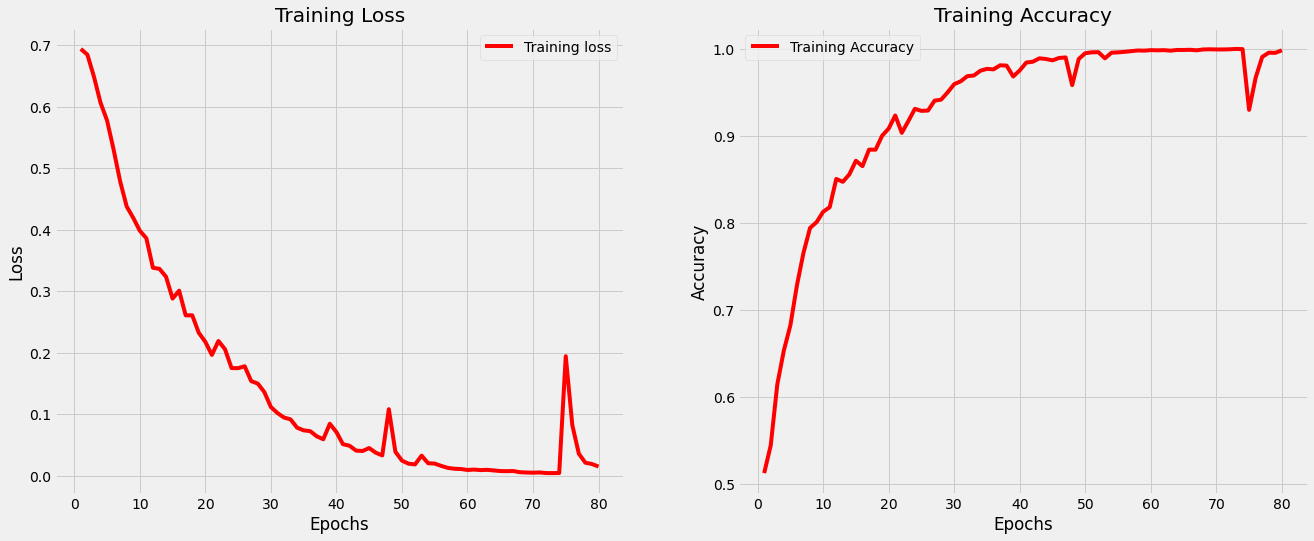

In [43]:
tr_plot(hist,0)

/content/drive/My Drive/Copy of 2.png
(1, 128, 128, 1)
1/1 [==============================] - 0s 142ms/step
<class 'numpy.ndarray'>
Person has healthy. [[0. 1.]]


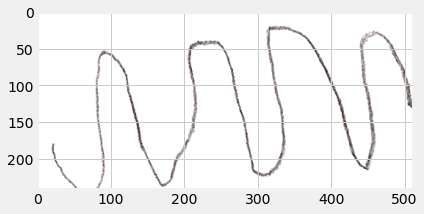

In [44]:
path = input()
image = Image.open(path)
new_img = image.resize((128,128)) 
plt.imshow(new_img)
img_gray = new_img.convert('L')
img_array = np.asarray(img_gray)
img_array = img_array.reshape(-1,128,128,1)
print(img_array.shape)
prediction = model.predict(img_array)
print(type(prediction[0]))
if np.any(prediction) > 0.5:
    
    print("Person has healthy.",prediction)
else:
    print("Person has Parkinson",prediction)
    
plt.imshow(image)